## Genetic algorithms approach to feature discretization in artificial neural networks for the prediction of stock price index

In [ ]:
import numpy as np
import pandas as pd

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import sys
sys.path.append("..") 
from tp_utils.data_provider import read_prices, read_data
import pandas_ta as pta

In [37]:
market = 'BTC-USDT'
tf = '15m'

df_raw = read_data(market, tf)
assert df_raw[df_raw.isna()==True].sum().sum() == 0

In [102]:
df = df_raw[-10000:].copy()
df.columns = (['T', 'open', 'high', 'low', 'close', 'volume'])
df = df.reset_index(drop=True)

In [103]:
n = 10
CustomStrategy = pta.Strategy(
    name="Genetic features discretization",
    description="enetic features discretization",
    ta=[
        {"kind": "stoch", "k" : n},
        {"kind": "mom", "length": 4},
        {"kind": "roc", "length": n}
    ]
)
# Run it
df.ta.strategy(CustomStrategy)
df['target'] = np.sign(df['close'].diff(1).shift(-1))
df['target'] = df['target'].apply(lambda x: np.max([0,x]))
df = df.drop(['T', 'close', 'open', 'high', 'low', 'volume'], axis = 1)
features = df.dropna()

In [104]:
df

,STOCHk_10_3_3,STOCHd_10_3_3,MOM_4,ROC_10,target
0,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,66.89,NaN,0.0
...,...,...,...,...,...
9995,61.146873781,49.924688848,69.90,0.426823259,0.0
9996,65.794935763,59.494184288,105.63,-0.162832483,0.0
9997,50.540045197,59.160618247,9.06,-0.041916152,1.0
9998,50.014235129,55.449738696,-77.12,0.106422039,0.0


In [105]:
X = features.drop(['target'], axis=1)
y = features['target']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [132]:
#Training the model
classifier = RandomForestClassifier(n_estimators=30, random_state=17)
#classifier = RandomForestClassifier(n_estimators=30)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=17)

Accuracy score of the model is:  0.5106809078771696


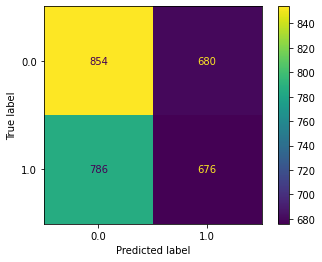

In [133]:
y_pred = classifier.predict(X_test)
print ("Accuracy score of the model is: ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test);

### Sklearn Discritization

In [155]:
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal')
X_binned = enc.fit_transform(X_train)

In [156]:
#Training the model
classifier = RandomForestClassifier(n_estimators=30, random_state=17)
#classifier = RandomForestClassifier(n_estimators=30)
classifier.fit(X_binned, y_train)

RandomForestClassifier(n_estimators=30, random_state=17)

Accuracy score of the model is:  0.5213618157543392


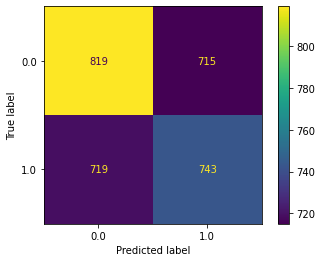

In [157]:
X_test_bin = enc.transform(X_test)
y_pred = classifier.predict(X_test_bin)
print ("Accuracy score of the model is: ", accuracy_score(y_test, y_pred))
plot_confusion_matrix(classifier, X_test_bin, y_test);

### Genetic

In [99]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [209]:
n_features = 4
n_disc = 256
bits = np.log2(n_disc).astype(int)
n_tresh = 4

chrome = np.zeros(bits * n_tresh * n_features, int)
chrome[6] = 1
x1 = chrome.reshape(n_features, -1)
x2 = x1[0].reshape(n_tresh,-1)

bins = np.packbits(x2, axis = 1).reshape(-1)


In [211]:
tresh_vals = np.linspace(0,1,n_disc)

bins = tresh_vals[bins]

In [172]:
#Scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
X_train

array([[0.19087894, 0.28352827, 0.61883357, 0.49334333],
       [0.16514215, 0.23171076, 0.60419185, 0.48305652],
       [0.30605304, 0.2171737 , 0.64028452, 0.52155253],
       ...,
       [0.45341513, 0.30591555, 0.64742612, 0.50603129],
       [0.74782767, 0.49228462, 0.75563318, 0.60344588],
       [0.84538498, 0.69083322, 0.81412412, 0.60272442]])

In [174]:
data = np.random.random(100)
bins = np.linspace(0, 1, 10)
digitized = np.digitize(data, bins)

In [175]:
data

array([0.62252693, 0.62399913, 0.31888515, 0.57817604, 0.43829736,
       0.29917023, 0.95962775, 0.33069726, 0.83775793, 0.57590617,
       0.87413715, 0.05310798, 0.02944801, 0.17080539, 0.45972102,
       0.56937516, 0.3202481 , 0.50335835, 0.55751551, 0.93839933,
       0.81393314, 0.80866751, 0.12477049, 0.50745114, 0.8068992 ,
       0.23916304, 0.2261876 , 0.97789647, 0.79039836, 0.07765706,
       0.80929517, 0.48447102, 0.69365827, 0.58511303, 0.22208064,
       0.68981846, 0.51606513, 0.51503423, 0.68568476, 0.52283777,
       0.12569429, 0.88388493, 0.89972218, 0.91006644, 0.71162716,
       0.11490882, 0.15198365, 0.38971777, 0.25715744, 0.67024629,
       0.97434778, 0.73847416, 0.84123711, 0.58085856, 0.98836698,
       0.14880087, 0.66533111, 0.24630906, 0.10664802, 0.84554163,
       0.47252435, 0.47142916, 0.63527033, 0.74647661, 0.64606762,
       0.81384454, 0.65318221, 0.04721742, 0.50343278, 0.84537598,
       0.69301259, 0.25086322, 0.99241854, 0.86412775, 0.81522

In [205]:
X_train

array([[0.19087894, 0.28352827, 0.61883357, 0.49334333],
       [0.16514215, 0.23171076, 0.60419185, 0.48305652],
       [0.30605304, 0.2171737 , 0.64028452, 0.52155253],
       ...,
       [0.45341513, 0.30591555, 0.64742612, 0.50603129],
       [0.74782767, 0.49228462, 0.75563318, 0.60344588],
       [0.84538498, 0.69083322, 0.81412412, 0.60272442]])